#📌 Customer Churn & Retention Analysis

Business Problem

Identify churn drivers, quantify their impact, and present actionable retention strategies to stakeholders.

Key questions:

- Who is churning and why?

- Which segments are highest risk?

- What actions will reduce churn fastest?

##1. Data reading and Exploration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customers = pd.read_csv('customers.csv')
billing = pd.read_csv('billing.csv')
usage = pd.read_csv('usage.csv')

df = customers.merge(billing, on='customer_id').merge(usage, on='customer_id')

df.head()

,customer_id,gender,age,tenure_months,contract_type,churn,monthly_charges,total_charges,payment_method,avg_monthly_usage,support_tickets
0,C000001,Male,54,29,One Year,Yes,94.31,2734.99,Bank Transfer,179.3,3
1,C000002,Female,25,13,Two Year,No,48.92,635.96,Bank Transfer,164.3,0
2,C000003,Male,24,9,Month-to-Month,No,58.67,528.03,Credit Card,253.3,1
3,C000004,Male,31,13,Month-to-Month,No,84.14,1093.82,Bank Transfer,68.2,1
4,C000005,Male,20,51,Two Year,No,83.52,4259.52,UPI,253.9,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        6000 non-null   object 
 1   gender             6000 non-null   object 
 2   age                6000 non-null   int64  
 3   tenure_months      6000 non-null   int64  
 4   contract_type      6000 non-null   object 
 5   churn              6000 non-null   object 
 6   monthly_charges    6000 non-null   float64
 7   total_charges      6000 non-null   float64
 8   payment_method     6000 non-null   object 
 9   avg_monthly_usage  6000 non-null   float64
 10  support_tickets    6000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 515.8+ KB


In [ ]:
df.describe()

,age,tenure_months,monthly_charges,total_charges,avg_monthly_usage,support_tickets
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,40.862000,18.690333,70.310977,1316.261737,250.786167,1.604500
std,13.446874,15.564644,19.726700,1196.663147,78.830922,1.754022
min,18.000000,1.000000,30.000000,30.000000,50.000000,0.000000
25%,29.000000,8.000000,56.520000,505.282500,196.500000,0.000000
50%,41.000000,14.000000,69.860000,948.225000,250.500000,1.000000
75%,53.000000,25.000000,83.620000,1714.715000,304.425000,2.000000
max,64.000000,71.000000,146.130000,9352.040000,500.000000,14.000000


##2. Exploratory Data Analysis

In [ ]:
#overall churn rate

df['churn'].value_counts(normalize= True)*100

,proportion
churn,
No,79.85
Yes,20.15


In [ ]:
#churn by contract type
df.groupby('contract_type')['churn'].value_counts(normalize= True).unstack()*100

churn,No,Yes
contract_type,,
Month-to-Month,66.097240,33.902760
One Year,90.011287,9.988713
Two Year,100.000000,NaN


In [ ]:
# tenure vs churn

df.groupby('churn')['tenure_months'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,4791.0,21.133793,16.129494,1.0,10.0,16.0,28.0,71.0
Yes,1209.0,9.007444,7.345480,1.0,3.0,7.0,13.0,35.0


In [ ]:
#charges vs churn

df.groupby('churn')['monthly_charges'].mean()


,monthly_charges
churn,
No,70.37937
Yes,70.03995


In [ ]:
#support tickets vs churn
df.groupby('churn')['support_tickets'].mean()


,support_tickets
churn,
No,0.998956
Yes,4.004136


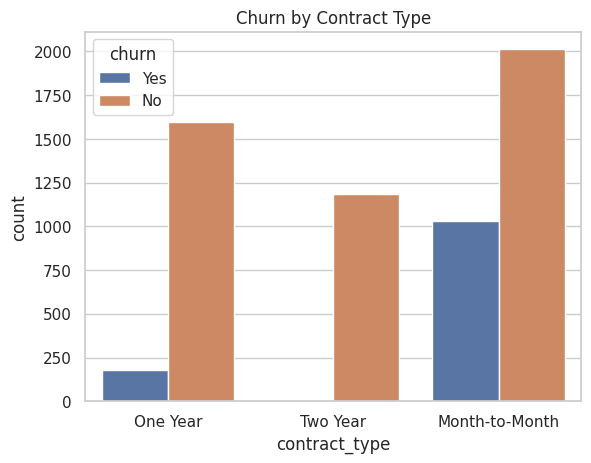

In [ ]:
# Churn by Contract Type
sns.set(style = 'whitegrid')
sns.countplot(data=df, x='contract_type', hue='churn')
plt.title('Churn by Contract Type')
plt.show()


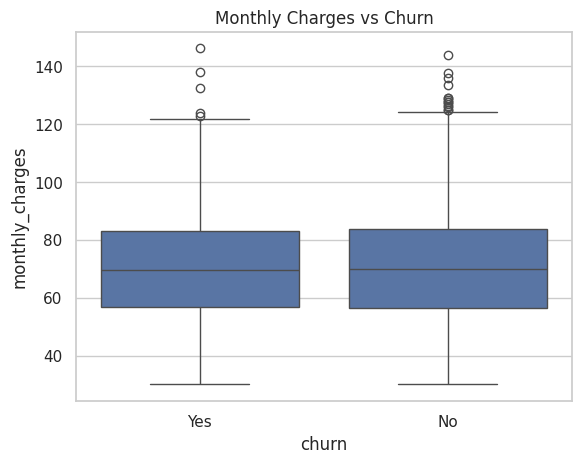

In [ ]:
#Monthly Charges vs Churn
sns.boxplot(data=df, x='churn',y='monthly_charges')
plt.title('Monthly Charges vs Churn')
plt.show()

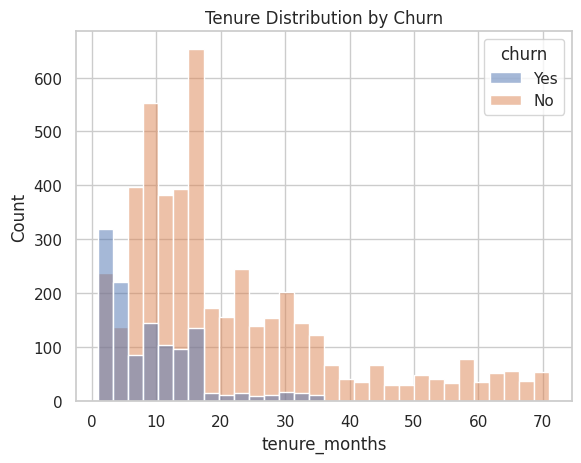

In [ ]:
# Tenure Distribution
sns.histplot(data=df, x='tenure_months', hue='churn', bins=30)
plt.title("Tenure Distribution by Churn")
plt.show()


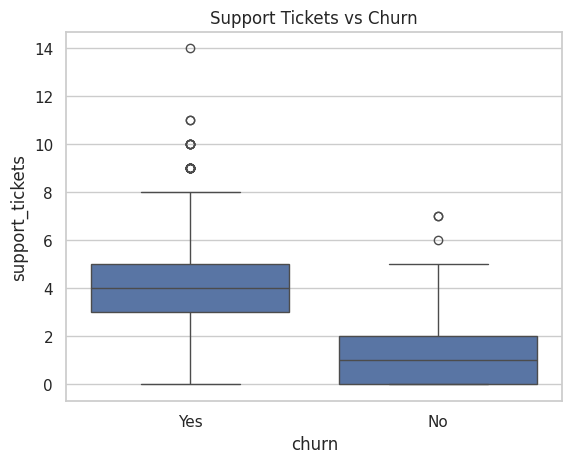

In [ ]:
#Support Tickets vs Churn
sns.boxplot(data=df, x='churn', y='support_tickets')
plt.title("Support Tickets vs Churn")
plt.show()


##3. STATISTICAL TESTING

In [ ]:
from scipy.stats import ttest_ind

# Extract data
churned = df[df['churn'] == 'Yes']['monthly_charges']
retained = df[df['churn'] == 'No']['monthly_charges']

# Perform one-tailed t-test (testing if churned > retained)
t_stat, p_value = ttest_ind(churned, retained, equal_var=False, alternative='greater')

# Decision making
alpha = 0.05

if p_value < alpha:
    print(f"Reject H₀. Churned customers pay significantly more (p = {p_value:.4f})")
else:
    print(f"Fail to reject H₀. No evidence that churned customers pay more (p = {p_value:.4f})")

Fail to reject H₀. No evidence that churned customers pay more (p = 0.7039)


In [ ]:
#Tenure Test (Non-parametric)
from scipy.stats import mannwhitneyu

u_stat, pvalue = mannwhitneyu(
    df[df['churn']=='Yes']['tenure_months'],
    df[df['churn']=='No']['tenure_months']
)

alpha = 0.05
print(f"Mann-Whitney U Test Result:")
print(f"U statistic: {u_stat:,.0f}")
print(f"P-value: {pvalue:.2e}")

if pvalue < alpha:
    print(f"Reject H₀ (p < {alpha})")
    print("Churned customers have significantly shorter tenure.")
else:
    print(f"Fail to reject H₀ (p ≥ {alpha})")

Mann-Whitney U Test Result:
U statistic: 1,327,240
P-value: 5.25e-187
Reject H₀ (p < 0.05)
Churned customers have significantly shorter tenure.





##4. **Business Insights**

1. **Early-tenure customers churn the most**
   Churn is heavily concentrated within the first six months of onboarding, indicating a fragile early customer experience.

2. **Month-to-Month contracts are the primary churn driver**
   Customers on short-term contracts show significantly higher churn than those on longer commitments.

3. **Higher pricing is associated with increased churn risk**
   Churned customers pay higher average monthly charges, suggesting price sensitivity among at-risk users.

4. **Operational friction precedes churn**
   Customers who raise more support tickets are more likely to churn, indicating unresolved issues before exit.

5. **Churn is structural, not random**
   Contract type, tenure, pricing, and service experience collectively explain churn behavior more than demographics.


## **Recommendations**

1. **Strengthen early-tenure retention programs**
   Introduce onboarding incentives, proactive check-ins, or limited-time discounts within the first six months.

2. **Encourage migration to longer-term contracts**
   Offer incentives for Month-to-Month customers to upgrade to annual plans to reduce churn exposure.

3. **Implement targeted pricing interventions**
   Review pricing for high-risk customers and test personalized discounts or bundled offers.

4. **Use support interactions as churn signals**
   Flag customers with frequent support tickets for proactive retention outreach.

5. **Prioritize retention efforts by risk, not volume**
   Focus resources on early-tenure, high-charge, high-friction segments where churn impact is highest.


